<a href="https://colab.research.google.com/github/iliaxant/empirical_mode_decomposition/blob/main/EMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import CubicSpline
from scipy.fft import fft, fftfreq
from scipy.interpolate import PchipInterpolator

5000


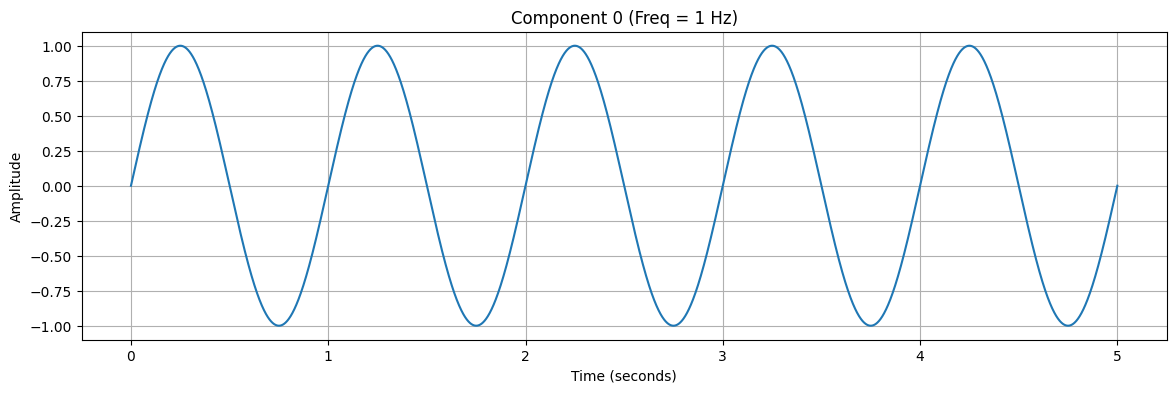

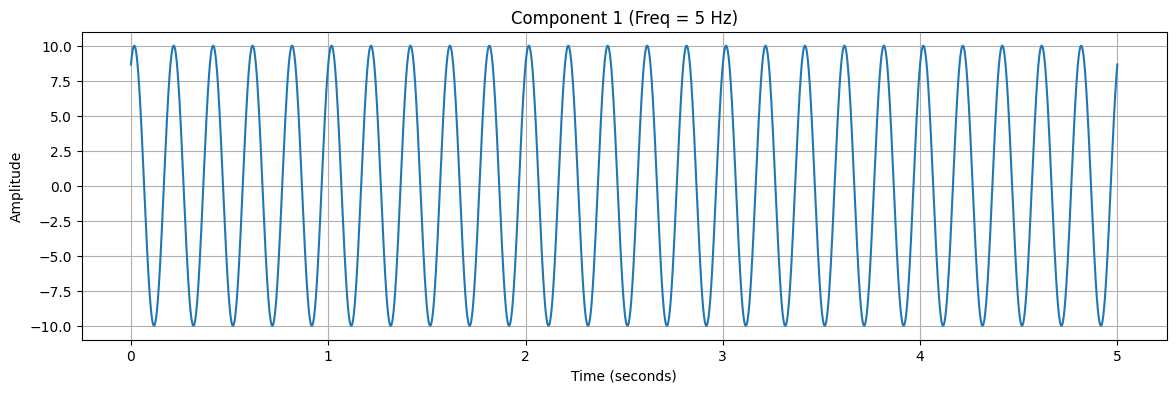

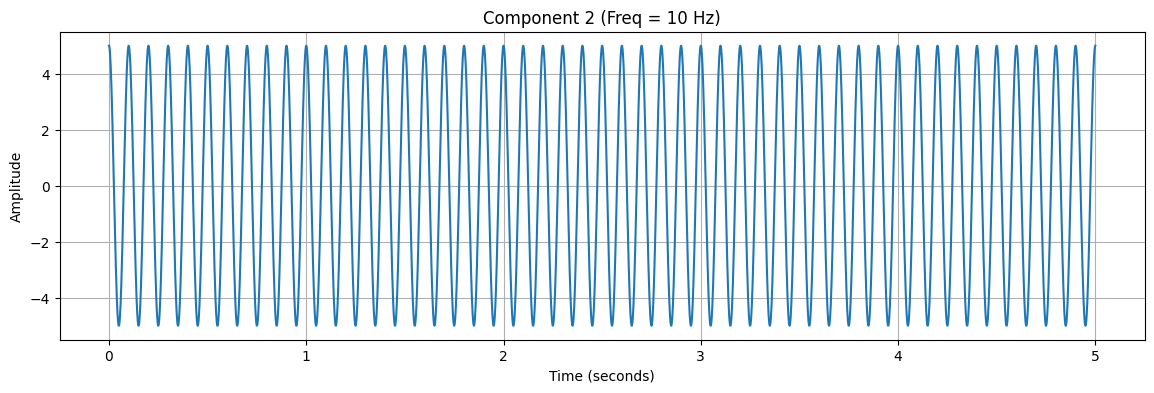

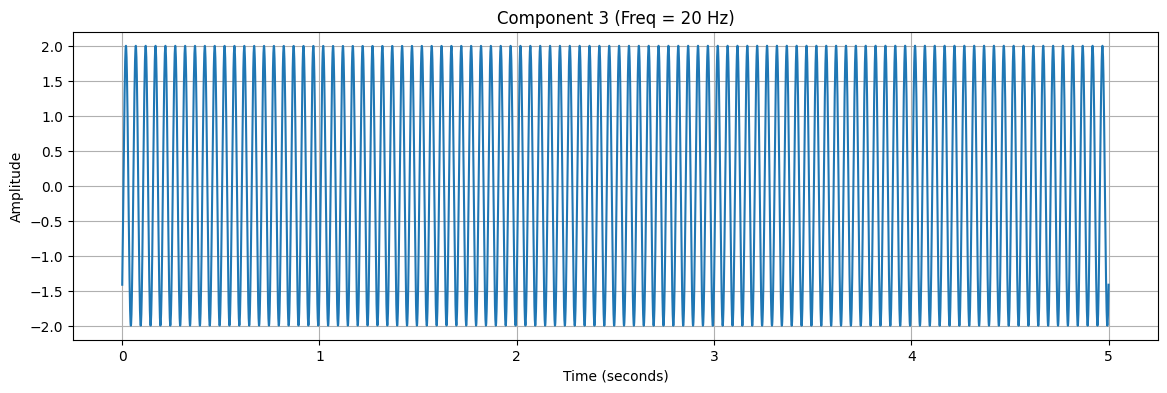

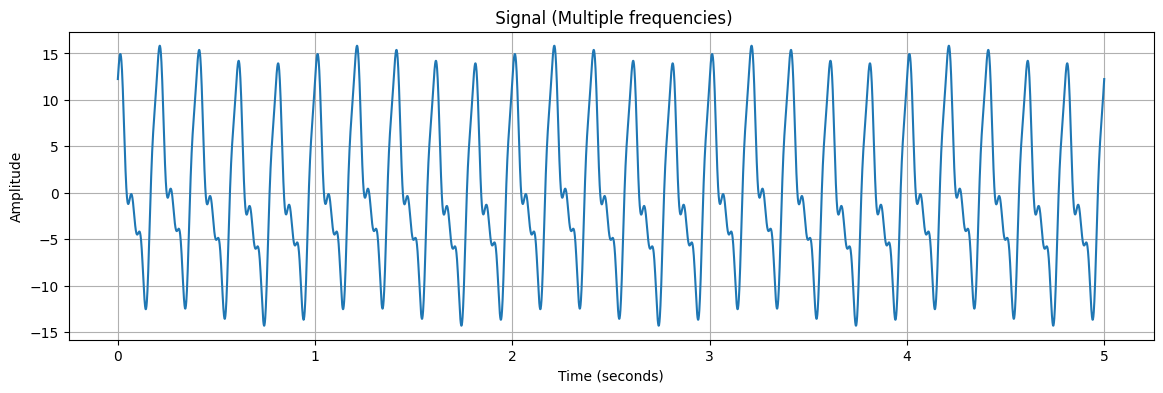

In [2]:
fs = 1000
time_dur = 5

t = np.linspace(0,time_dur, time_dur*fs)
freqs = []
components = []

f1 = 1
c1 = np.sin(2*np.pi*f1*t)
freqs.append(f1)
components.append(c1)

f2 = 5
c2 = 10 * np.sin(2*np.pi*f2*t+ np.pi/3)
freqs.append(f2)
components.append(c2)

f3 = 10
c3 = 5*np.cos(2*np.pi*f3*t)
freqs.append(f3)
components.append(c3)

f4 = 20
c4 = 2*np.sin(2*np.pi*f4*t-np.pi/4)
freqs.append(f4)
components.append(c4)

print(len(c1))
for i in range(len(components)):

    plt.figure(figsize = (14,4))
    plt.plot(t,components[i])
    plt.title(f"Component {i} (Freq = {freqs[i]} Hz)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

signal = sum(components)

plt.figure(figsize = (14,4))
plt.plot(t,signal)
plt.title(f" Signal (Multiple frequencies)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [ ]:
def sift_once(time, residual, iteration):

    peaks_pos, _ = find_peaks(residual)
    peaks_pos_times = time[peaks_pos]
    peaks_neg, _ = find_peaks(-residual)
    peaks_neg_times = time[peaks_neg]

    if len(peaks_pos) < 2 or len(peaks_neg) < 2:
        return None

    upper_envelope = PchipInterpolator(peaks_pos_times, residual[peaks_pos],
                                  extrapolate=True)(time)
    lower_envelope = PchipInterpolator(peaks_neg_times, residual[peaks_neg],
                                  extrapolate=True)(time)
    mean_env = (upper_envelope + lower_envelope) / 2

    plt.figure(figsize=(16,5))
    plt.title(f'Signal and extracted IMF (Iteration: {iteration})')

    plt.plot(t,signal, label = 'Signal')

    plt.plot(peaks_pos_times, signal[peaks_pos], 'o', color='r')
    plt.plot(t, upper_envelope, color='r', label = 'Upper Envelope')

    plt.plot(peaks_neg_times, signal[peaks_neg], 'o', color='g')
    plt.plot(t, lower_envelope, color='g', label = 'Lower Envelope')

    plt.plot(t, imf, color='black', label = f'Extracted IMF {iteration}')

    plt.grid(True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()


    plt.figure(figsize=(16,5))
    plt.title(f'Extracted IMF {iteration}')
    plt.plot(t,imf, color='black')
    plt.grid(True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

    return residual - mean_env


def empirical_mode_decomposition(time, signal, max_iter = 10):

  residual_signal = signal.copy()
  imfs = []

  for iter in range(1,max_iter+1):
    print(f"Iteration {iter}:\n")



  return imfs, residual_signal


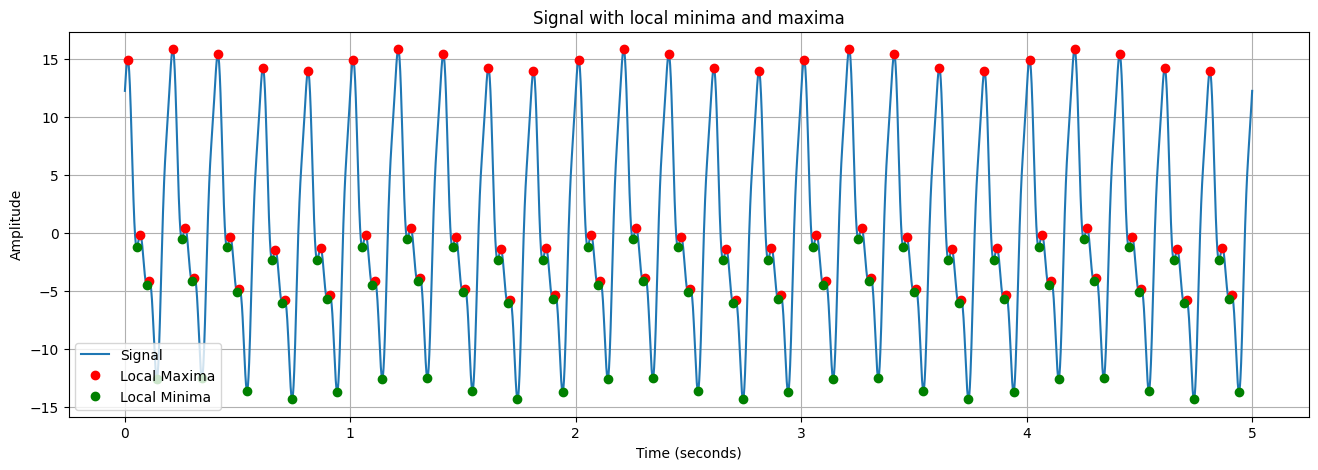

In [ ]:
#for i in range(len(components)):
signal_pos_peaks, signal_pos_peaks_props = find_peaks(signal,
                                                      #prominence=0.5,
                                                      )
signal_neg_peaks, signal_pos_peaks_props = find_peaks(-signal,
                                                      #prominence=0.5,
                                                      )
signal_pos_peak_times = t[signal_pos_peaks]
signal_neg_peak_times = t[signal_neg_peaks]

plt.figure(figsize=(16,5))
plt.title('Signal with local minima and maxima')

plt.plot(t,signal, label = 'Signal')

plt.plot(signal_pos_peak_times, signal[signal_pos_peaks], 'o', color='r',
         label = 'Local Maxima')

plt.plot(signal_neg_peak_times, signal[signal_neg_peaks], 'o', color='g',
         label = 'Local Minima')

plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

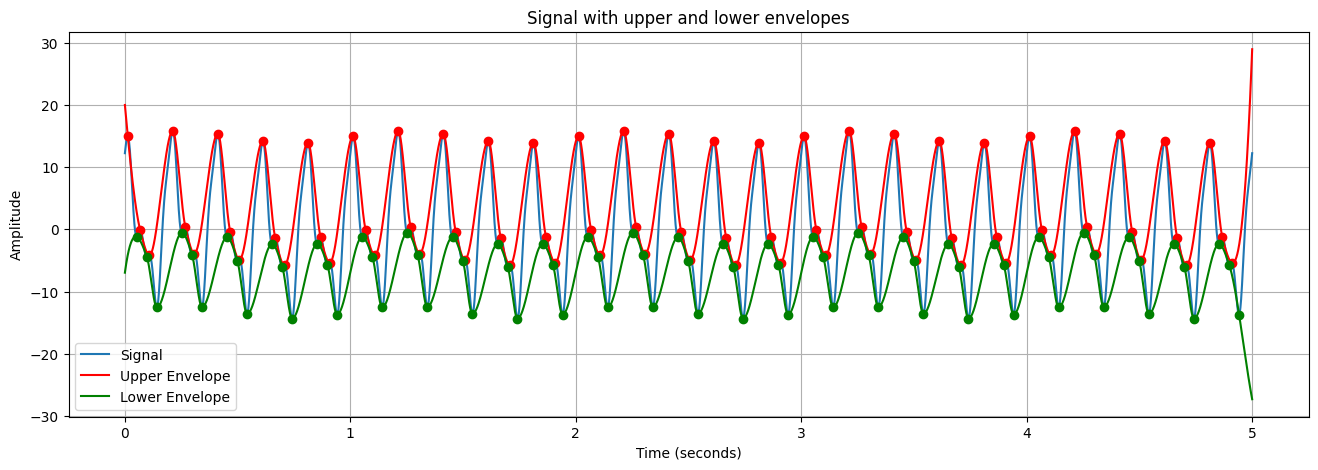

In [ ]:
upper_envelope = PchipInterpolator(signal_pos_peak_times, signal[signal_pos_peaks], extrapolate=True)(t)
lower_envelope = PchipInterpolator(signal_neg_peak_times, signal[signal_neg_peaks], extrapolate=True)(t)


plt.figure(figsize=(16,5))
plt.title('Signal with upper and lower envelopes')

plt.plot(t,signal, label = 'Signal')

plt.plot(signal_pos_peak_times, signal[signal_pos_peaks], 'o', color='r')
plt.plot(t, upper_envelope, color='r', label = 'Upper Envelope')

plt.plot(signal_neg_peak_times, signal[signal_neg_peaks], 'o', color='g')
plt.plot(t, lower_envelope, color='g', label = 'Lower Envelope')

plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

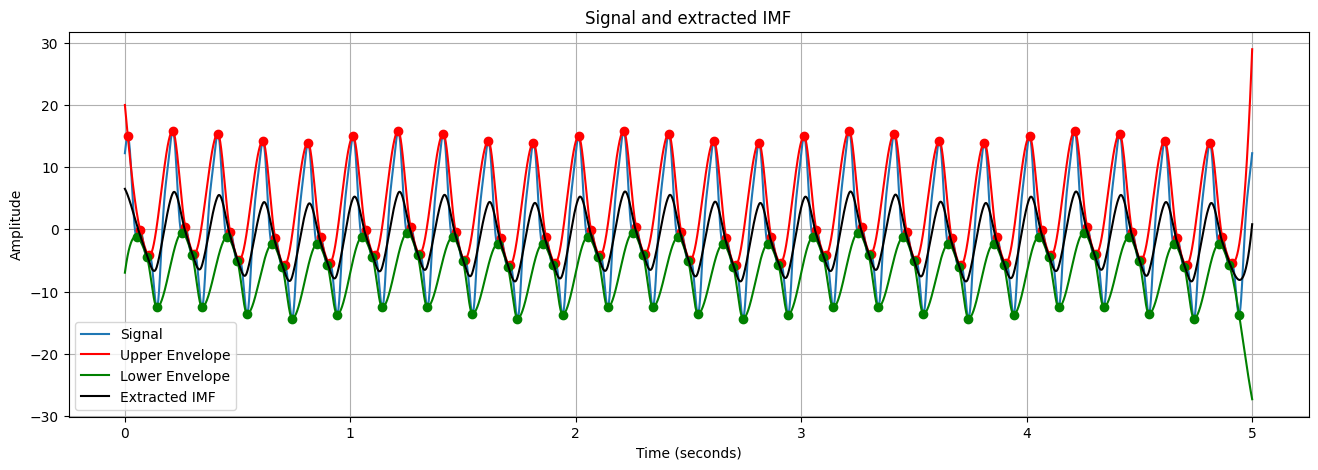

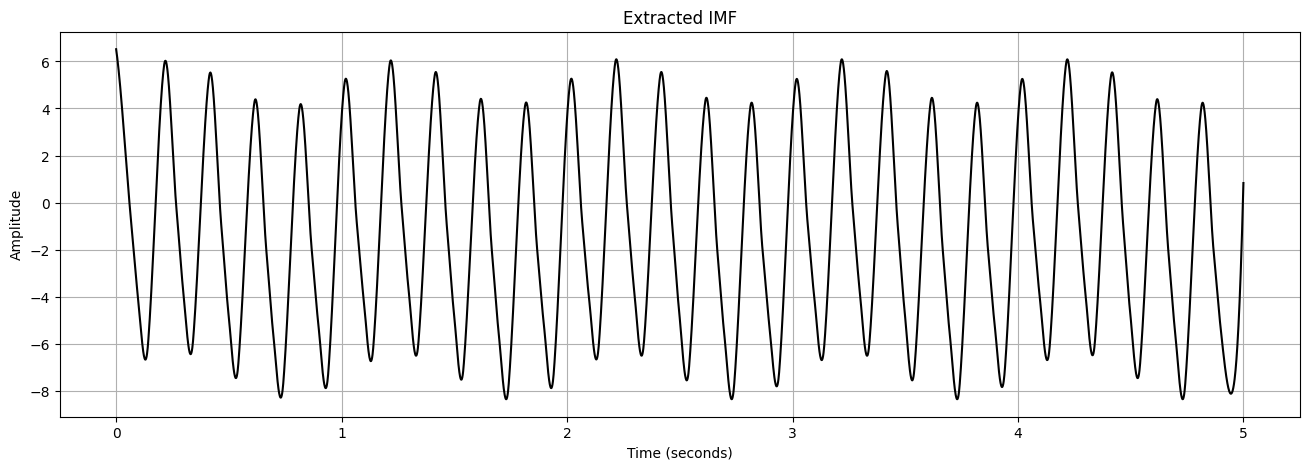

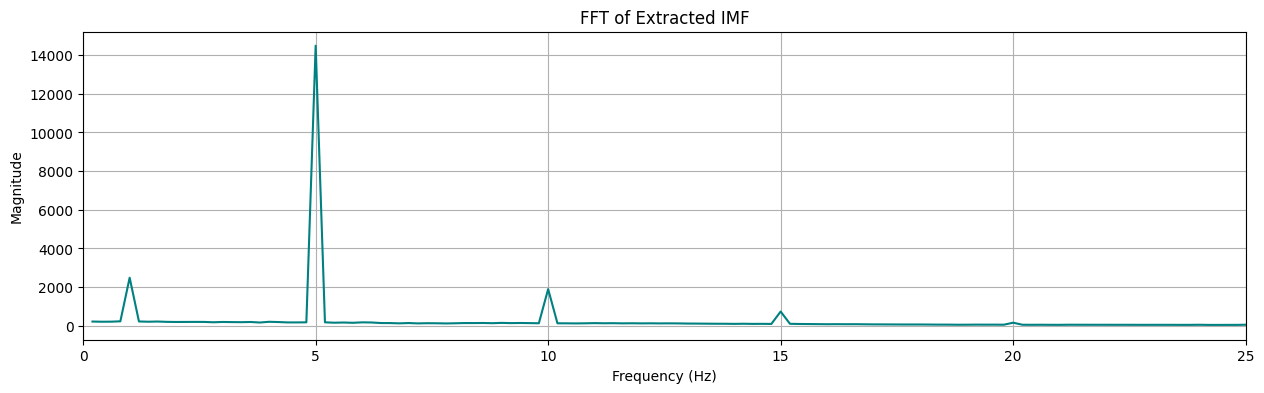

In [ ]:
imf = (upper_envelope + lower_envelope) / 2

plt.figure(figsize=(16,5))
plt.title('Signal and extracted IMF')

plt.plot(t,signal, label = 'Signal')

plt.plot(signal_pos_peak_times, signal[signal_pos_peaks], 'o', color='r')
plt.plot(t, upper_envelope, color='r', label = 'Upper Envelope')

plt.plot(signal_neg_peak_times, signal[signal_neg_peaks], 'o', color='g')
plt.plot(t, lower_envelope, color='g', label = 'Lower Envelope')

plt.plot(t,imf, color='black' ,label = 'Extracted IMF')

plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


plt.figure(figsize=(16,5))
plt.title('Extracted IMF')
plt.plot(t,imf, color='black')
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


magn_imf = fft(imf)
freq_imf = fftfreq(len(imf), d=1/fs)

idxs = np.where(freq_imf > 0)
freq_test = freq_imf[idxs]
magn_test = np.abs(magn_imf[idxs])

plt.figure(figsize=(15, 4))
plt.plot(freq_test, magn_test, color='teal')
plt.title(f"FFT of Extracted IMF")
plt.xlim([0, 25])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

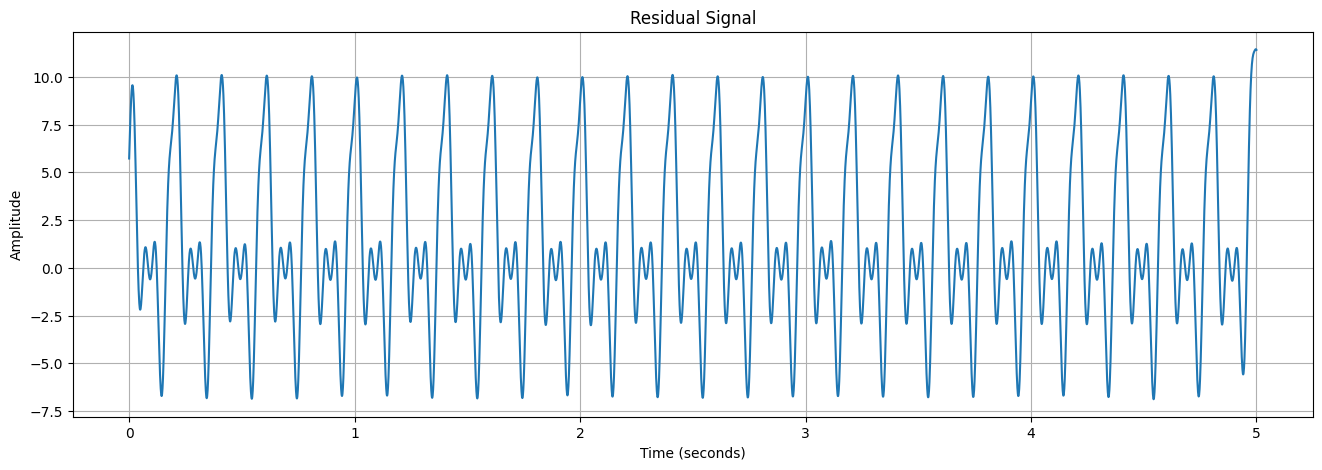

In [ ]:
residual_signal = signal - imf

plt.figure(figsize=(16,5))
plt.title('Residual Signal')
plt.plot(t, residual_signal)
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()